# Let us now see how to perform a Two Way ANOVA. 

### The following is the description of the dataset that we are going to use for Two Way ANOVA.

### Problem Statement:

The dose for effective dialysis depends on duration of treatment and weight gain between treatments. To study the effects of these two factors on the number of days hospitalized attributable to kidney failure, a random sample of 10 patients per group undergone treatment in a large dialysis facility was obtained. Treatment duration was a two levels: short and long. Average weight gain between treatments during the year was categorized into three levels: mild, moderate and severe.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

%matplotlib inline 

In [3]:
df = pd.read_csv('C:\\Users\\yashs\\OneDrive\\Desktop\\Files_for_Analysis\\Dialysis (1).csv')

In [4]:
df

,Duration,Weight_Gain,Patient,Days
0,1,1,1,0
1,1,1,2,2
2,1,1,3,1
3,1,1,4,3
4,1,1,5,0
5,1,1,6,2
6,1,1,7,0
7,1,1,8,5
8,1,1,9,6
9,1,1,10,8


In [5]:
df.head()

,Duration,Weight_Gain,Patient,Days
0,1,1,1,0
1,1,1,2,2
2,1,1,3,1
3,1,1,4,3
4,1,1,5,0


In [6]:
df["Duration"].value_counts()

2    30
1    30
Name: Duration, dtype: int64

In [7]:
df["Weight_Gain"].value_counts()

3    20
2    20
1    20
Name: Weight_Gain, dtype: int64

In [8]:
df.describe()

,Duration,Weight_Gain,Patient,Days
count,60.000000,60.000000,60.00000,60.000000
mean,1.500000,2.000000,5.50000,6.333333
std,0.504219,0.823387,2.89652,6.693449
min,1.000000,1.000000,1.00000,0.000000
25%,1.000000,1.000000,3.00000,2.000000
50%,1.500000,2.000000,5.50000,4.000000
75%,2.000000,3.000000,8.00000,8.000000
max,2.000000,3.000000,10.00000,30.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Duration     60 non-null     int64
 1   Weight_Gain  60 non-null     int64
 2   Patient      60 non-null     int64
 3   Days         60 non-null     int64
dtypes: int64(4)
memory usage: 2.0 KB


Now, let us go ahead and perform one way ANOVA with 'Weight Gain' with respect to 'Days'.

In [10]:
df['Weight_Gain']= pd.Categorical(df['Weight_Gain'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Duration     60 non-null     int64   
 1   Weight_Gain  60 non-null     category
 2   Patient      60 non-null     int64   
 3   Days         60 non-null     int64   
dtypes: category(1), int64(3)
memory usage: 1.7 KB


Now, we notice that the data type of the variable 'Weight Gain' has been changed.

In [12]:
df['Weight_Gain'].value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    3
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    2
41    2
42    2
43    2
44    2
45    2
46    2
47    2
48    2
49    2
50    3
51    3
52    3
53    3
54    3
55    3
56    3
57    3
58    3
59    3
Name: Weight_Gain, dtype: category
Categories (3, int64): [1, 2, 3]>

## The Hypothesis for the One Way ANOVA are:
    
## $H_0$: $All\,the\, population\, means\,of\,the\,samples\,under\,consideration\, are\, equal.$
## $H_a$: $At \,least\,one\,of\,the\, population\, means\,of \,the\,samples\,under\,consideration\, are\, unequal.$


In [13]:
formula = 'Days ~ C(Weight_Gain)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                  df       sum_sq     mean_sq          F    PR(>F)
C(Weight_Gain)   2.0   760.433333  380.216667  11.510091  0.000063
Residual        57.0  1882.900000   33.033333        NaN       NaN


Now, we see that the corresponding p-value is less than alpha (0.05). Thus, we $\textbf{fail to Accept}$ accept the $\textbf{Null Hypothesis}$ ($H_0$).
This means at least one particular category in the 'Weight_Gain' variable has different mean of 'Days' as compared to the other categories.

Let us now perform One Way ANOVA with the variable 'Duration' with respect to 'Days'.

In [14]:
df['Duration']= pd.Categorical(df['Duration'])

In [15]:
formula = 'Days ~ C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

               df       sum_sq     mean_sq         F  PR(>F)
C(Duration)   1.0   209.066667  209.066667  4.981322  0.0295
Residual     58.0  2434.266667   41.970115       NaN     NaN


Now, we see that the corresponding p-value is less than alpha (0.05). Thus, we $\textbf{fail to Accept}$ accept the $\textbf{Null Hypothesis}$ ($H_0$).
This means at least one particular category in the 'Duration' variable has different mean of 'Days' as compared to the other categories.

Here, since we have two categories in the 'Duration' variable we can easily say that the means of this two categories with respect to the variable 'Days' is different.

Let us now perform the Two Way ANOVA. We will now analyse the effect of both the treatments on the 'Days' variable.

In [16]:
formula = 'Days ~ C(Weight_Gain) + C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                  df       sum_sq     mean_sq          F    PR(>F)
C(Weight_Gain)   2.0   760.433333  380.216667  12.720581  0.000028
C(Duration)      1.0   209.066667  209.066667   6.994563  0.010589
Residual        56.0  1673.833333   29.889881        NaN       NaN


The p-value in the both the treatments is less than $\alpha$(0.05) and thus we will reject the Null Hypothesis.

Let us check whether there is any interaction effect between the treatments.

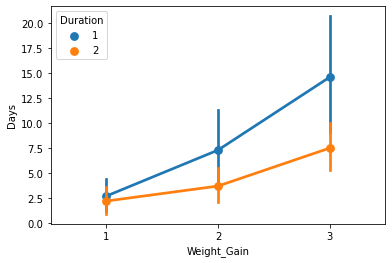

In [17]:
sns.pointplot(x='Weight_Gain', y='Days', data=df, hue='Duration');

Now, let us plot the graph for interaction effect without the confidence intervals.

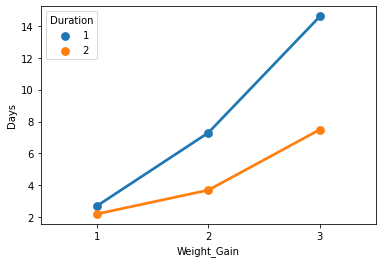

In [18]:
sns.pointplot(x='Weight_Gain', y='Days', data=df, hue='Duration',ci=None);

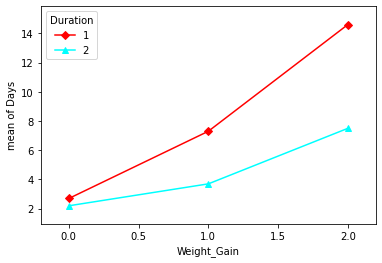

In [19]:
#Method 2 of drawing an interaction plot

from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(x=df['Weight_Gain'],trace=df['Duration'],response=df['Days'],markers=['D','^']);

Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.

In [20]:
formula = 'Days ~ C(Weight_Gain) + C(Duration) + C(Weight_Gain):C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df       sum_sq     mean_sq          F    PR(>F)
C(Weight_Gain)               2.0   760.433333  380.216667  13.120974  0.000023
C(Duration)                  1.0   209.066667  209.066667   7.214724  0.009587
C(Weight_Gain):C(Duration)   2.0   109.033333   54.516667   1.881327  0.162240
Residual                    54.0  1564.800000   28.977778        NaN       NaN


Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.
But we see that the p-value of the interaction effect term of 'Weight_Gain' and 'Duration' suggests that the Null Hypothesis is true in this case.